In [4]:
import sys

sys.path.append('/Users/huberyhu/Desktop/SURP/im_deinfluence/model_code')

import networkx as nx
import experiment_framework as ef
import matplotlib.pyplot as plt
import pickle
import copy

In [5]:
# Load the graph from the file
save_path = '/Users/huberyhu/Desktop/SURP/im_deinfluence/network_data/facebook.gpickle'
try:
    with open(save_path, 'rb') as f:
        G = pickle.load(f)
    print(f"Graph loaded from {save_path}")
except Exception as e:
    print(f"An error occurred while loading the graph: {e}")

Graph loaded from /Users/huberyhu/Desktop/SURP/im_deinfluence/network_data/facebook.gpickle


In [6]:
graph_type = "facebook"
num_nodes = G.number_of_nodes()
influencers_cascade_steps = 3
num_influencers = 30
k_deinfluencers_ls = [0,1,2,3,4,5,6,7,8,9,10]  # Different values of k to test
general_cascade_steps = 3
num_avg_runs = 3
num_edges = G.number_of_edges()

In [7]:
model = ef.run_influence_cascade(G, num_influencers=num_influencers, steps=influencers_cascade_steps, selection_method='random')

# Evaluate the influence and deinfluence
num_influenced = model.evaluate_influence()
num_deinfluenced = model.evaluate_deinfluence()
num_susceptible = model.evaluate_susceptible()

# Create a deep copy of the model
model_fixed_influencers = copy.deepcopy(model)

# Evaluate the influence and deinfluence
num_influenced = model_fixed_influencers.evaluate_influence()
num_deinfluenced = model_fixed_influencers.evaluate_deinfluence()
num_susceptible = model_fixed_influencers.evaluate_susceptible()

print(f"Number of influenced nodes: {num_influenced}")
print(f"Number of deinfluenced nodes: {num_deinfluenced}")
print(f"Number of susceptible nodes: {num_susceptible}")
print('influencer', model.selected_influencers)

Number of influenced nodes: 1609
Number of deinfluenced nodes: 0
Number of susceptible nodes: 2430
influencer {645, 3596, 1038, 1807, 2959, 1683, 2327, 2970, 1818, 668, 673, 292, 805, 1069, 686, 2492, 572, 2114, 1097, 841, 1359, 1104, 2258, 341, 2529, 2788, 1511, 626, 757, 3451}


In [8]:
deinfluencers_list = ef.select_deinfluencers(k_deinfluencers_ls, model_fixed_influencers)
results = ef.average_results(deinfluencers_list, model_fixed_influencers, num_runs=num_avg_runs, steps=general_cascade_steps)

/Users/huberyhu/Desktop/SURP/im_deinfluence/model_code/experiment_framework.py:482: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


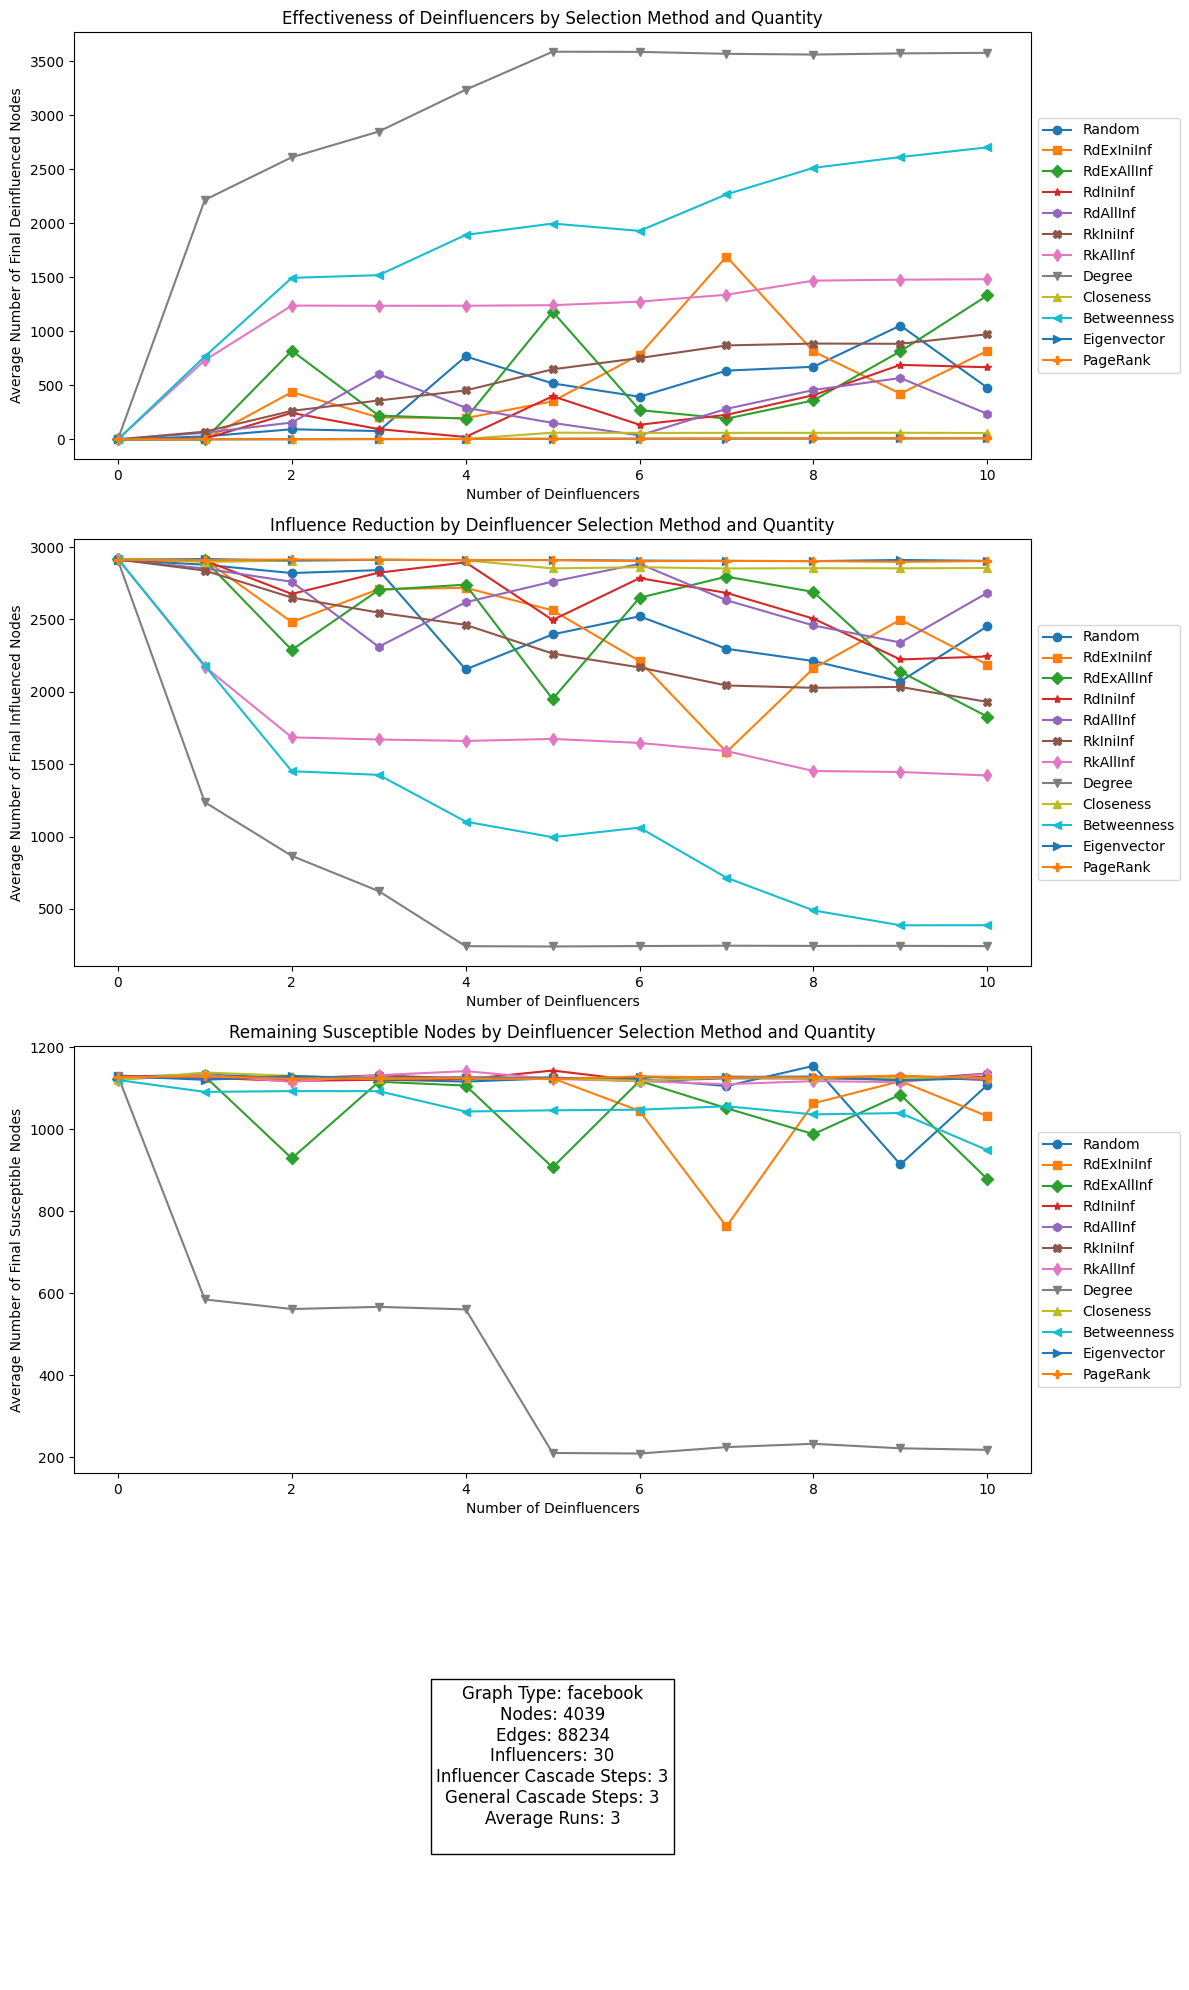

In [9]:
ef.plot_deinfluencer_results_exp1(results, G, graph_type, num_nodes, num_edges, num_influencers, influencers_cascade_steps, general_cascade_steps, num_avg_runs)